# EDA
- We will look at US domestic flights from 2019.
- Do some exploratory analysis.
- Maybe finish with ML algorithm to predict delays.

## Datasets
- [Flight on-time data](https://www.transtats.bts.gov/)
- [Airline & Aiports database](https://openflights.org/data.html)

In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures, MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import sys
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# import local functions
path_to_functions = 'C:/Users/Zaca/Documents/GitHub/useful-functions/'
sys.path.append(path_to_functions)
from plotting import default_plot, get_colors


data_path = 'C:/Users/Zaca/Documents/Datasets/flights/'

In [40]:
# matplotlib formatting
small = 10
medium = 12
large = 14

plt.rc('font', size=medium)         # controls default text sizes
plt.rc('axes', titlesize=medium)     # fontsize of the axes title
plt.rc('axes', labelsize=medium)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=medium)   # fontsize of the tick labels
plt.rc('ytick', labelsize=medium)   # fontsize of the tick labels
plt.rc('legend', fontsize=medium)   # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5   

In [41]:
# open file (1.3GB so it will be slow)
flights = pd.read_csv(data_path + '2019.csv', index_col=0)

C:\Users\Zaca\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [42]:
# get column description from file
cols = pd.read_csv(data_path + 'columns.txt', sep=',', names=['colname', 'coldesc'], index_col= False)
cols

,colname,coldesc
0,FlightDate,Flight Date (yyyymmdd)
1,Month,Month
2,DayofMonth,Day of Month
3,DayOfWeek,Day of Week
4,Reporting_Airline,Unique Carrier Code
5,Flight_Number_Reporting_Airline,Flight Number
6,OriginAirportID,Airport ID
7,Origin,Origin Airport
8,OriginCityName,City Name
9,OriginState,Origin Airport State Code


In [43]:
# examine top 5 rows
flights.head()

,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginState,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,4,5,2019-01-04,OO,5657,14698,SBP,"San Luis Obispo, CA",CA,...,0.0,70.0,51.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0
1,1,4,5,2019-01-04,OO,5658,12266,IAH,"Houston, TX",TX,...,0.0,103.0,109.0,76.0,438.0,0.0,0.0,0.0,0.0,0.0
2,1,4,5,2019-01-04,OO,5658,14783,SGF,"Springfield, MO",MO,...,0.0,132.0,121.0,88.0,513.0,0.0,0.0,0.0,0.0,0.0
3,1,4,5,2019-01-04,OO,5659,12389,ISN,"Williston, ND",ND,...,0.0,118.0,110.0,80.0,576.0,0.0,0.0,0.0,0.0,0.0
4,1,4,5,2019-01-04,OO,5660,13342,MKE,"Milwaukee, WI",WI,...,0.0,184.0,163.0,127.0,896.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# examine dtypes
flights.dtypes

Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportID                        int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
DepTime                            float64
DepDelay                           float64
TaxiOut                            float64
WheelsOff                          float64
WheelsOn                           float64
TaxiIn                             float64
CRSArrTime                           int64
ArrTime                            float64
ArrDelay   

In [45]:
print(flights.shape[0])
flights.isna().sum()

7268232


Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Reporting_Airline                  0
Flight_Number_Reporting_Airline    0
OriginAirportID                    0
Origin                             0
OriginCityName                     0
OriginState                        0
DestAirportID                      0
Dest                               0
DestCityName                       0
DestState                          0
CRSDepTime                         0
DepTime                            0
DepDelay                           0
TaxiOut                            0
WheelsOff                          0
WheelsOn                           0
TaxiIn                             0
CRSArrTime                         0
ArrTime                            0
ArrDelay                           0
Cancelled                          0
Diverted                           0
CRSElapsedTime                     0
A

### Holy sh!t there are 7.27 million flights in our dataset.
- Let's try to look at the first few columns.

1. Flight date is in object format, let's turn in into date-time for timeseries analysis.
2. Reporting airline are abbreviated (IATA codes), we need to find an actual human name for them.

## Airlines

In [46]:
# loot at unique values for Airlines.
airlines = flights.Reporting_Airline.unique()
print(airlines)

# there's only 17 of them... megacorporations...

['OO' 'AS' '9E' 'AA' 'MQ' 'WN' 'G4' 'OH' 'B6' 'NK' 'DL' 'YV' 'EV' 'F9'
 'YX' 'UA' 'HA']


In [47]:
# I found an Airline dataset we can try to use to translate IATA codes.
airlines_ds = pd.read_csv(data_path + 'world_airlines.csv', index_col=0, names=['NAME', 'ALIAS', 'IATA', 'ICAO', 'CALLSIGN', 'COUNTRY', 'ACTIVE'])

In [48]:
# we can make a dictionary to translate codes to actual names
airline_dictionary = {k:airlines_ds.loc[airlines_ds.IATA == k, 'NAME'].values[0] for k in airlines}
airline_dictionary

{'OO': 'SkyWest',
 'AS': 'Alaska Airlines',
 '9E': 'Pinnacle Airlines',
 'AA': 'American Airlines',
 'MQ': 'American Eagle Airlines',
 'WN': 'Southwest Airlines',
 'G4': 'Allegiant Air',
 'OH': 'Comair',
 'B6': 'JetBlue Airways',
 'NK': 'Spirit Airlines',
 'DL': 'Delta Air Lines',
 'YV': 'Mesa Airlines',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines',
 'YX': 'Midwest Airlines',
 'UA': 'United Airlines',
 'HA': 'Hawaiian Airlines'}

In [49]:
# ok this was beautiful.
# let's look at the share of flights between them.
flights.Reporting_Airline.value_counts(normalize=True)

WN    0.182653
DL    0.135937
AA    0.127162
OO    0.112247
UA    0.085125
YX    0.044112
MQ    0.043292
B6    0.040274
OH    0.038750
AS    0.035912
9E    0.034719
YV    0.030349
NK    0.027640
F9    0.018307
EV    0.017636
G4    0.014370
HA    0.011514
Name: Reporting_Airline, dtype: float64

In [50]:
airline_share = flights.Reporting_Airline.value_counts(normalize=True)
airline_share = pd.DataFrame(airline_share).reset_index().rename(columns={'index':'airline_code', 'Reporting_Airline':'market_share'})
airline_share['colors'] = get_colors('viridis_r', airline_share.shape[0], plot=False)

In [51]:
# for now, we are using the market share ranking of airlines to define their colors
color_dict = {k:airline_share[airline_share['airline_code'] == k]['colors'].values[0] for k in airline_share['airline_code'].values}
color_dict

{'WN': (0.974417, 0.90359, 0.130215, 1.0),
 'DL': (0.814576, 0.883393, 0.110347, 1.0),
 'AA': (0.657642, 0.860219, 0.203082, 1.0),
 'OO': (0.496615, 0.826376, 0.306377, 1.0),
 'UA': (0.35236, 0.783011, 0.392636, 1.0),
 'YX': (0.239374, 0.735588, 0.455688, 1.0),
 'MQ': (0.153894, 0.680203, 0.504172, 1.0),
 'B6': (0.120081, 0.622161, 0.534946, 1.0),
 'OH': (0.128729, 0.563265, 0.551229, 1.0),
 'AS': (0.149039, 0.508051, 0.55725, 1.0),
 '9E': (0.172719, 0.448791, 0.557885, 1.0),
 'YV': (0.19943, 0.387607, 0.554642, 1.0),
 'NK': (0.227802, 0.326594, 0.546532, 1.0),
 'F9': (0.257322, 0.25613, 0.526563, 1.0),
 'EV': (0.278012, 0.180367, 0.486697, 1.0),
 'G4': (0.28291, 0.105393, 0.426902, 1.0),
 'HA': (0.269944, 0.014625, 0.341379, 1.0)}

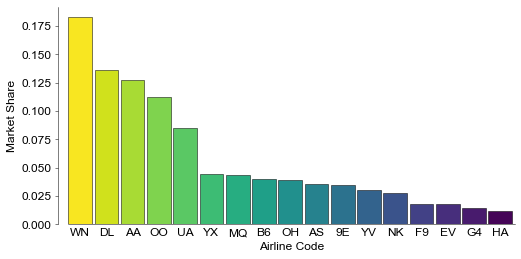

In [52]:
# makes a categorical bar plot
# input data has to be a dataframe with 3 columns
# column 0 contains the labels that go on the x-axis (already pre-formatted)
# column 1 contains the values
# column 2 contains the colors
# the title of the value-columns contains the label for the Y-axis
# the name variable should contain path and filename to save to file

def categorical_bar(data, rotation=0, name='default_categorical_bar', save=False):

    size_dict = {4:4,
                 17:8}
    
    labels = list(data[data.columns[0]])
    values = list(data[data.columns[1]])

    fig, ax = plt.subplots(figsize=(size_dict[data.shape[0]], 4))
    ax = default_plot(ax, ['left'])
    x = range(len(values))
    
    ax.xaxis.set_tick_params(length=0)
    #ax.spines['bottom'].set_visible(False)
    
    plt.xlim(-0.45, len(values) - 0.45)

    xlabel = data.columns[0].replace('_',' ').title()
    ylabel = data.columns[1].replace('_',' ').title()

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(x, labels)
    plt.bar(x, values, width=.9, color=data.colors, edgecolor='k', lw=.5)
    
    if save:
        plt.tight_layout()
        plt.savefig(name + '.png', dpi=300)
    
    plt.show()
    
categorical_bar(airline_share)

# Airports
- Get database of worldwide Airports to extract information such as latitude, longitude, names, city and so on and merge with the IATA codes in our dataset.

In [53]:
airports_ds = pd.read_csv(data_path + 'world_airports.csv', index_col=0, names=['ID', 'NAME', 'CITY', 'COUNTRY', 'IATA', 'ICAO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TIMEZONE', 'DST', 'TZ_OLSON', 'TYPE', 'SOURCE'])

In [54]:
# grab all the airports in our dataset
airports = flights.Origin.unique()

# create a dictionary for airport name with IATA codes
airport_dictionary = {k:airports_ds.loc[airports_ds.IATA == k, 'NAME'].values[0] for k in airports}

# apparently there are 2 airports in our dataset that are not present in the database, I could just 
# drop all the flights that involve these locations, bu I kind of like to fix it.
# all we need are their names and their locations

airports_ds = airports_ds[airports_ds.IATA.isin(airports)]
airports_ds

,NAME,CITY,COUNTRY,IATA,ICAO,LATITUDE,LONGITUDE,ALTITUDE,TIMEZONE,DST,TZ_OLSON,TYPE,SOURCE
ID,,,,,,,,,,,,,
1970,Pago Pago International Airport,Pago Pago,American Samoa,PPG,NSTU,-14.331000,-170.710007,32,-11,U,Pacific/Pago_Pago,airport,OurAirports
2244,Saipan International Airport,Saipan,Northern Mariana Islands,SPN,PGSN,15.119000,145.729004,215,10,U,Pacific/Saipan,airport,OurAirports
2246,Antonio B. Won Pat International Airport,Agana,Guam,GUM,PGUM,13.483400,144.796005,298,10,U,Pacific/Guam,airport,OurAirports
2883,Cyril E. King Airport,St. Thomas,Virgin Islands,STT,TIST,18.337299,-64.973396,23,-4,U,America/St_Thomas,airport,OurAirports
2884,Henry E Rohlsen Airport,St. Croix Island,Virgin Islands,STX,TISX,17.701900,-64.798599,74,-4,U,America/St_Thomas,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,Hilton Head Airport,Hilton Head Island,United States,HHH,KHXD,32.224400,-80.697502,19,-5,A,America/New_York,airport,OurAirports
9543,Ogden Hinckley Airport,Ogden,United States,OGD,KOGD,41.195900,-112.012001,4473,-7,A,America/Denver,airport,OurAirports
9776,Stillwater Regional Airport,Stillwater,United States,SWO,KSWO,36.161201,-97.085701,1000,-6,A,America/Chicago,airport,OurAirports


In [55]:
# there are 360 airports in the data, these will end up being too many categories for a classification algorithms,
# probably the best way would be to select the top 50 airports.

In [56]:
# let's see how many unique routes there are.
flights['route'] = flights['Origin'] + '-' + flights['Dest']
flights['route'].unique().size
# there are over 6k unique routes. let's see the most popular ones

6515

In [57]:
flights['route'].value_counts()[:50]

LGA-ORD    14169
ORD-LGA    14108
LAX-SFO    14088
SFO-LAX    14086
LAX-JFK    12751
JFK-LAX    12698
LAX-LAS    11617
LAS-LAX    11612
HNL-OGG    10721
OGG-HNL    10717
LGA-BOS     9910
BOS-LGA     9854
LGA-ATL     9365
ATL-LGA     9336
MCO-ATL     9269
ATL-MCO     9231
SFO-SEA     9171
SEA-SFO     9166
ATL-FLL     8615
FLL-ATL     8600
LAX-SEA     8591
SEA-LAX     8570
DCA-BOS     8563
BOS-DCA     8542
LAX-ORD     7847
ORD-LAX     7847
HNL-KOA     7801
KOA-HNL     7792
DCA-ORD     7736
ORD-DCA     7732
SFO-LAS     7677
LAS-SFO     7650
PHX-DEN     7643
DEN-PHX     7616
ATL-ORD     7575
JFK-SFO     7543
SFO-JFK     7541
ORD-ATL     7505
PHL-BOS     7496
BOS-ORD     7496
ORD-BOS     7484
BOS-PHL     7458
DFW-ORD     7402
ORD-DFW     7390
SFO-SAN     7325
MSP-ORD     7301
ORD-MSP     7291
SAN-SFO     7286
DEN-LAX     7229
DFW-LAX     7198
Name: route, dtype: int64

In [58]:
# top 20 airports by number of flights
flights.Origin.value_counts()[:40].values.sum()/flights.shape[0]

0.725110040516043

We could explore this dataset forever, I still kind of want to, but let's get to what matters
# Delays
- For now the threshold for delay will be 15 min.

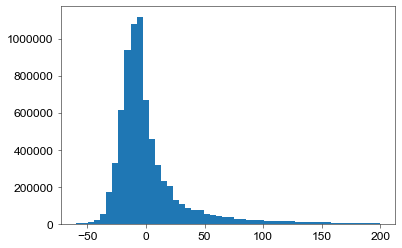

In [59]:
# let's look at the distribution of delays
plt.hist(flights['ArrDelay'], bins= 50, range=(-60, 200));

In [60]:
# departure and arrival delays (> threshold)
delay_threshold = 15
flights['delay_on'] = np.where(flights['DepDelay'] >= delay_threshold, 1, 0)
flights['delay_off'] = np.where(flights['ArrDelay'] >= delay_threshold, 1, 0)

In [61]:
# calculate total percentage of flights delayed on departure
flights.delay_on.value_counts(normalize=True)

0    0.813784
1    0.186216
Name: delay_on, dtype: float64

In [62]:
# calculate total percentage of flights delayed on arrival
flights.delay_off.value_counts(normalize=True)

0    0.80886
1    0.19114
Name: delay_off, dtype: float64

In [63]:
# group by airline and get percentage of delays
delays_by_airline = flights.pivot_table(index=['Reporting_Airline'], aggfunc={'delay_off': lambda x: np.sum(x)/x.size}).sort_values(by='delay_off', ascending=False).reset_index()

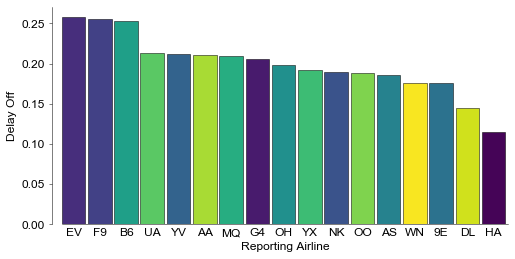

In [64]:
delays_by_airline['colors'] = delays_by_airline['Reporting_Airline'].map(color_dict)
delays_by_airline['airline_name'] = delays_by_airline['Reporting_Airline'].map(airline_dictionary)
categorical_bar(delays_by_airline)

In [65]:
delays_by_airline

,Reporting_Airline,delay_off,colors,airline_name
0,EV,0.257755,"(0.278012, 0.180367, 0.486697, 1.0)",Atlantic Southeast Airlines
1,F9,0.254928,"(0.257322, 0.25613, 0.526563, 1.0)",Frontier Airlines
2,B6,0.253252,"(0.120081, 0.622161, 0.534946, 1.0)",JetBlue Airways
3,UA,0.213568,"(0.35236, 0.783011, 0.392636, 1.0)",United Airlines
4,YV,0.211654,"(0.19943, 0.387607, 0.554642, 1.0)",Mesa Airlines
5,AA,0.211089,"(0.657642, 0.860219, 0.203082, 1.0)",American Airlines
6,MQ,0.209253,"(0.153894, 0.680203, 0.504172, 1.0)",American Eagle Airlines
7,G4,0.206246,"(0.28291, 0.105393, 0.426902, 1.0)",Allegiant Air
8,OH,0.197861,"(0.128729, 0.563265, 0.551229, 1.0)",Comair
9,YX,0.192458,"(0.239374, 0.735588, 0.455688, 1.0)",Midwest Airlines


In [66]:
#timeout_margin_hover_text = ['<b>Score: {x} <br>Timeouts: {y}'.format(x=x_values[i], y=timeout_margin_hist[i]) for i in range(len(timeout_margin_hist))]
#timeout_margin_hover_text[list(timeout_margin_edges).index(np.median(timeout_margins))] = '<b>Median <br> Score: {x} <br> Timeouts: {y}'.format(x=x_values[list(timeout_margin_edges).index(np.median(timeout_margins))], y=timeout_margin_hist[list(timeout_margin_edges).index(np.median(timeout_margins))])

hovertemplate ='<i> </i>: $%{y:.2f}' + '<br><b>X</b>: %{x}<br>' + '<b>%{text}</b>'

fig = px.bar(delays_by_airline, 
             x='Reporting_Airline', 
             y='delay_off',
             hover_name='airline_name',
             hover_data=[], 
             color='delay_off',
             labels={'pop':'population of Canada'},
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    hoverlabel=dict(
        bgcolor='white', 
        font_size=16, 
        font_family="Roboto"
    )
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.layout.template = 'plotly_white'
fig.show()

In [67]:
delays_by_airport = flights.pivot_table(index=['Dest'], aggfunc={'delay_off': lambda x: np.sum(x)/len(x)}).reset_index().sort_values(by='delay_off', ascending=False)

In [68]:
delays_by_airport

,Dest,delay_off
274,PSE,0.327183
115,EWR,0.302094
222,MKG,0.300442
204,LWB,0.291139
250,OTH,0.290960
...,...,...
355,WYS,0.062016
205,LWS,0.058223
107,EKO,0.056801
53,BTM,0.048961


# Plotting Airports on Map by % of Flights Delayed

In [69]:
# merge delay data onto location data
delay_map = airports_ds[['IATA','NAME','LATITUDE', 'LONGITUDE']].merge(delays_by_airport[['Dest', 'delay_off']], left_on='IATA', right_on='Dest')

In [70]:
delay_map

,IATA,NAME,LATITUDE,LONGITUDE,Dest,delay_off
0,PPG,Pago Pago International Airport,-14.331000,-170.710007,PPG,0.266667
1,SPN,Saipan International Airport,15.119000,145.729004,SPN,0.097872
2,GUM,Antonio B. Won Pat International Airport,13.483400,144.796005,GUM,0.122156
3,STT,Cyril E. King Airport,18.337299,-64.973396,STT,0.178476
4,STX,Henry E Rohlsen Airport,17.701900,-64.798599,STX,0.172103
...,...,...,...,...,...,...
355,HHH,Hilton Head Airport,32.224400,-80.697502,HHH,0.208007
356,OGD,Ogden Hinckley Airport,41.195900,-112.012001,OGD,0.192308
357,SWO,Stillwater Regional Airport,36.161201,-97.085701,SWO,0.138790
358,XWA,Williston Basin International Airport,48.259722,-103.750556,XWA,0.163366


In [71]:
# making an interactive plot of USA and its airports
# learning plotly express


fig = go.Figure(data=go.Scattergeo(
        lon = delay_map['LONGITUDE'],
        lat = delay_map['LATITUDE'],
        text = delay_map['NAME'] + ' ' + delay_map['delay_off'].astype('str'),
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis_r',
            cmin = 0,
            color = delays_by_airport['delay_off'],
            cmax = delays_by_airport['delay_off'].max(),
            colorbar_title="Flights late >60 min")))

fig.update_layout(
        title = 'US Airports',
        geo_scope='usa',
    )
fig.show()

# Selecting Specific Routes

In [72]:
origin = 'LAX'
destination = 'JFK'


selection = flights[(flights.Origin == origin) & (flights.Dest == destination)]

In [73]:
# Plot Route

In [104]:
route = airports_ds[(airports_ds['IATA'] == origin) | (airports_ds['IATA'] == destination)][['LONGITUDE','LATITUDE','NAME','IATA']]

In [105]:
route

,LONGITUDE,LATITUDE,NAME,IATA
ID,,,,
3484,-118.407997,33.942501,Los Angeles International Airport,LAX
3797,-73.778900,40.639801,John F Kennedy International Airport,JFK


In [159]:

# customize hover text
text = ['<b>{x}'.format(x=x) for x in route['NAME'].values]

# define hover label properties
hoverlabel = dict(bgcolor="white", 
                  font_size=12, 
                  font_family="Helvetica")

# customize markers
marker = dict(size=5,
              color='rgb(255, 0, 0)',
              line=dict(width=3,
              color='rgba(68, 68, 68, 0)'))

# customiz geo properties
geo = dict(showland=True,
           landcolor='rgb(243, 243, 243)',
           countrycolor='rgb(204, 204, 204)',
           scope='north america',
           projection_type='azimuthal equal area')

margin = {"r":0,"t":0,"l":0,"b":0}

# create figure object
fig = go.Figure()

# add airport markers
fig.add_trace(go.Scattergeo(lon=route['LONGITUDE'],
                            lat=route['LATITUDE'],
                            mode='markers',
                            marker=marker))

# add route line between airports
fig.add_trace(go.Scattergeo(lon=[route[route['IATA'] == origin]['LONGITUDE'].values[0], route[route['IATA'] == destination]['LONGITUDE'].values[0]],
                            lat=[route[route['IATA'] == origin]['LATITUDE'].values[0], route[route['IATA'] == destination]['LATITUDE'].values[0]],
                            mode='lines',
                            hoverinfo='text',
                            text=text,
                            line=dict(width=1,
                                      color='red')))
# add layout configurations
fig.update_layout(showlegend=False,
                  geo=geo,
                  hoverlabel=hoverlabel,
                  width=500,
                  height=300,
                  margin=margin)

fig.show()